# 最近のPA関連の求人票を使って可視化してみる

In [1]:
import json
import pandas as pd
from urllib import request
import collections
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import re
from wordcloud import WordCloud

In [3]:
# Yahoo! APIの設定
APPID = "YOUR CLIENT ID"
URL = "https://jlp.yahooapis.jp/KeyphraseService/V2/extract"
headers = {
    "Content-Type": "application/json",
    "User-Agent": "Yahoo AppID: {}".format(APPID),
}
param_dic = {
    "id": "1234-1",
    "jsonrpc": "2.0",
    "params": {}
}

def keyphrase_service(query):
    """
    与えられたテキストに対して、Yahoo!のキーフレーズ抽出APIを呼び出し
    キーフレーズのリストを返す関数
    """
    param_dic['params']['q'] = query
    param_dic['method'] = "jlp.keyphraseservice.extract"
    params = json.dumps(param_dic).encode()
    req = request.Request(URL, params, headers)
    with request.urlopen(req) as res:
        body = res.read()
    # APIのレスポンスからキーフレーズ部分を抽出
    return json.loads(body.decode())['result']['phrases']

def preprocess_text(text):
    """
    テキストの前処理を行う関数
    - 改行文字を半角スペースに置換
    - 連続する空白を1つの空白に置換
    - 前後の空白を削除
    """
    # 改行文字を半角スペースに置換
    text = text.replace('\n', ' ')
    
    # 連続する空白を1つの空白に置換
    text = re.sub(r'\s+', ' ', text)
    
    # 前後の空白を削除
    text = text.strip()
    
    return text

In [5]:
df = pd.read_csv('/Users/YOUR PATH/YOUR FILE NAME.csv')

In [7]:
# 「求人内容」カラムのテキストを前処理
df['求人内容_前処理済'] = df['求人内容'].apply(preprocess_text)

In [9]:
# 前処理済みのテキストに対してキーフレーズを抽出
kps_list = [keyphrase_service(text) for text in df['求人内容_前処理済']]

# 抽出した全キーフレーズのリストを作成
all_keyphrases = [kp['text'] for kps in kps_list for kp in kps]

# キーフレーズの出現回数をカウント
ct_keyphrases = collections.Counter(all_keyphrases)

In [11]:
# 結果を表示
print(all_keyphrases)

['持論', '他者', '労務施策', 'HR領域', '人事', 'AI', '広い視野', '上位', 'or構築', '各種統計手法', 'ストーリー', '機械学習', 'HRデータ利活用・DX関連施策', '事実', '自ら', '自ら提案', '新しい人事', '気概お持ち', '経営', '提案', 'DEI', 'エクイティ', 'セルフドリブン', 'リーダーシップ', 'ダイバーシティ', '人事実務', '人事部門', '本社部門', 'インクルージョン', '周囲', '強い意志', 'チームマネジメント', 'コミュニケーション', 'スキル', '課題', '上場企業', '英語', '中国語', '自らテーマ設定', 'PeopleAnalytics経験5年程度以上', '労務', '仮説検証', '領域', '統計学', '海外人事', '人事制度企画', '基礎', '課題解決提案', 'データ分析ツール', '企業内人事部門', '採用', '理解', '業務経験', 'データ', '経験', '利用経験', 'Anaplan', 'ピープルアナリティクス', '実務', 'ワークデー', '言語', '欧米型人事', '実務経験', 'コミュニケーション能力', '英語', '企画調整力', 'TOEIC800点以上', '海外業務経験', '海外', '高い英語力', '管理経験', '最低3年以上', '他者', '自ら', '気概お持ち', '意見', '行動力', '手', '新しいサービス', 'お持ち', 'Verbal', '読み書き', '他DTCインダストリーユニット', '監査', '人事ブティックファーム', '財務', 'TOEIC目安', '人事', 'やり取り', '人事領域', 'マーケティング', '会計', '税務チーム', 'プロジェクトマネジャー経験', '海外赴任', '大規模プロジェクト', 'コラボレーション機会', '人材', 'コラボレーション志向性', 'IT', 'コンサルティングファーム', 'シンクタンク', '大学院', '人事・HR領域', '行政機関', '実務経験', 'コミュニケーション能力', '思考力', '資料作成能力', 'データ分析', '調査', '

In [13]:
print(ct_keyphrases)

Counter({'経験': 4, '実務経験': 4, '人事': 3, '領域': 3, 'ピープルアナリティクス': 3, 'コンサルティングファーム': 3, '他者': 2, '機械学習': 2, '事実': 2, '自ら': 2, '気概お持ち': 2, '提案': 2, '人事部門': 2, '課題': 2, '英語': 2, 'データ': 2, 'コミュニケーション能力': 2, 'お持ち': 2, '人事領域': 2, '人材': 2, 'シンクタンク': 2, 'データ分析': 2, '調査': 2, 'SQL': 2, 'Python': 2, 'ご経験': 2, '分析': 2, '持論': 1, '労務施策': 1, 'HR領域': 1, 'AI': 1, '広い視野': 1, '上位': 1, 'or構築': 1, '各種統計手法': 1, 'ストーリー': 1, 'HRデータ利活用・DX関連施策': 1, '自ら提案': 1, '新しい人事': 1, '経営': 1, 'DEI': 1, 'エクイティ': 1, 'セルフドリブン': 1, 'リーダーシップ': 1, 'ダイバーシティ': 1, '人事実務': 1, '本社部門': 1, 'インクルージョン': 1, '周囲': 1, '強い意志': 1, 'チームマネジメント': 1, 'コミュニケーション': 1, 'スキル': 1, '上場企業': 1, '中国語': 1, '自らテーマ設定': 1, 'PeopleAnalytics経験5年程度以上': 1, '労務': 1, '仮説検証': 1, '統計学': 1, '海外人事': 1, '人事制度企画': 1, '基礎': 1, '課題解決提案': 1, 'データ分析ツール': 1, '企業内人事部門': 1, '採用': 1, '理解': 1, '業務経験': 1, '利用経験': 1, 'Anaplan': 1, '実務': 1, 'ワークデー': 1, '言語': 1, '欧米型人事': 1, '企画調整力': 1, 'TOEIC800点以上': 1, '海外業務経験': 1, '海外': 1, '高い英語力': 1, '管理経験': 1, '最低3年以上': 1, '意見': 1, '行動力': 1, '手': 1, 

In [15]:
print(kps_list)

[[{'score': 100, 'text': '持論'}, {'score': 85, 'text': '他者'}, {'score': 82, 'text': '労務施策'}, {'score': 81, 'text': 'HR領域'}, {'score': 73, 'text': '人事'}, {'score': 71, 'text': 'AI'}, {'score': 69, 'text': '広い視野'}, {'score': 66, 'text': '上位'}, {'score': 65, 'text': 'or構築'}, {'score': 63, 'text': '各種統計手法'}, {'score': 62, 'text': 'ストーリー'}, {'score': 61, 'text': '機械学習'}, {'score': 60, 'text': 'HRデータ利活用・DX関連施策'}, {'score': 59, 'text': '事実'}, {'score': 58, 'text': '自ら'}, {'score': 56, 'text': '自ら提案'}, {'score': 55, 'text': '新しい人事'}, {'score': 55, 'text': '気概お持ち'}, {'score': 53, 'text': '経営'}, {'score': 53, 'text': '提案'}], [{'score': 100, 'text': 'DEI'}, {'score': 73, 'text': 'エクイティ'}, {'score': 57, 'text': 'セルフドリブン'}, {'score': 54, 'text': 'リーダーシップ'}, {'score': 48, 'text': 'ダイバーシティ'}, {'score': 44, 'text': '人事実務'}, {'score': 41, 'text': '人事部門'}, {'score': 39, 'text': '本社部門'}, {'score': 38, 'text': 'インクルージョン'}, {'score': 38, 'text': '周囲'}, {'score': 38, 'text': '強い意志'}, {'score': 37, 'text': 'チ

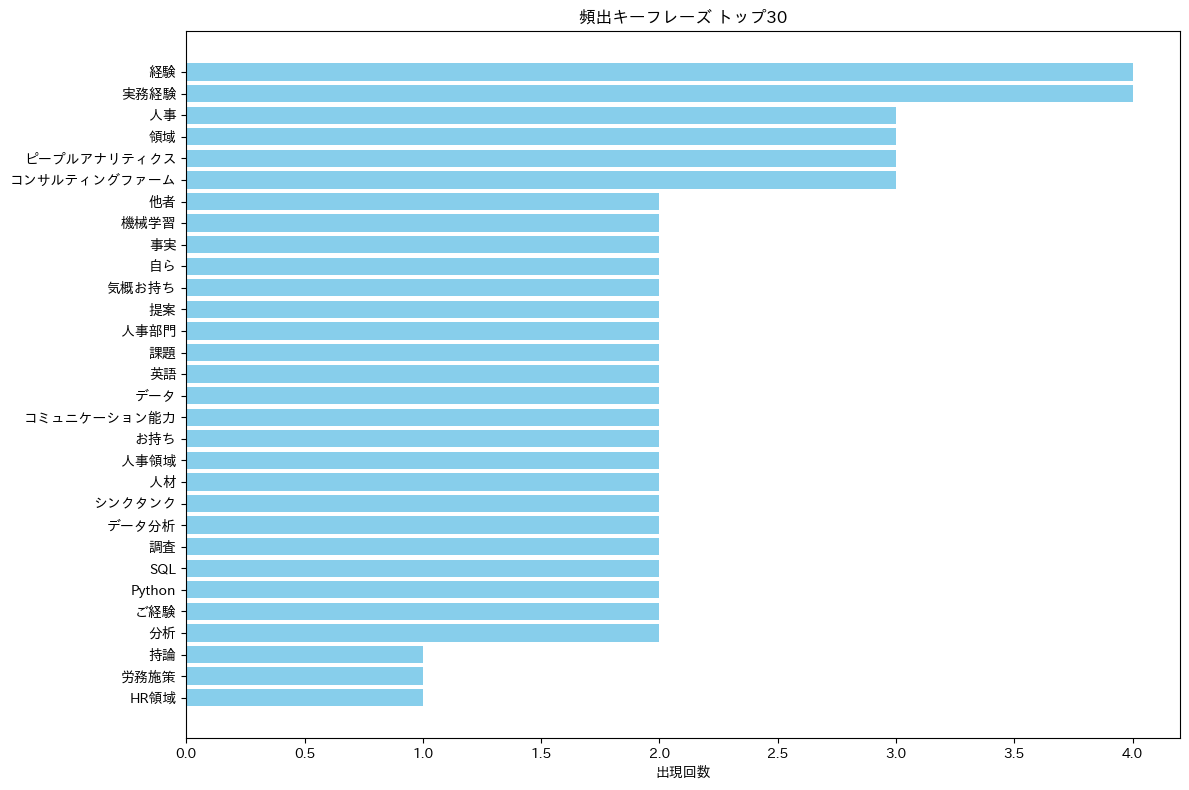

In [17]:
# 頻出回数が多い順に棒グラフで表示
# 上位30件を表示
top_n = 30
most_common = ct_keyphrases.most_common(top_n)
phrases = [item[0] for item in most_common]
counts = [item[1] for item in most_common]

# 棒グラフの作成
plt.figure(figsize=(12, 8))

phrases_reversed = phrases[::-1]
counts_reversed = counts[::-1]
bars = plt.barh(range(len(phrases_reversed)), counts_reversed, align='center', color='skyblue')
plt.yticks(range(len(phrases_reversed)), phrases_reversed)
plt.xlabel('出現回数')
plt.title(f'頻出キーフレーズ トップ{top_n}')

# Y軸のラベルを見やすくする
plt.tight_layout()
plt.show()

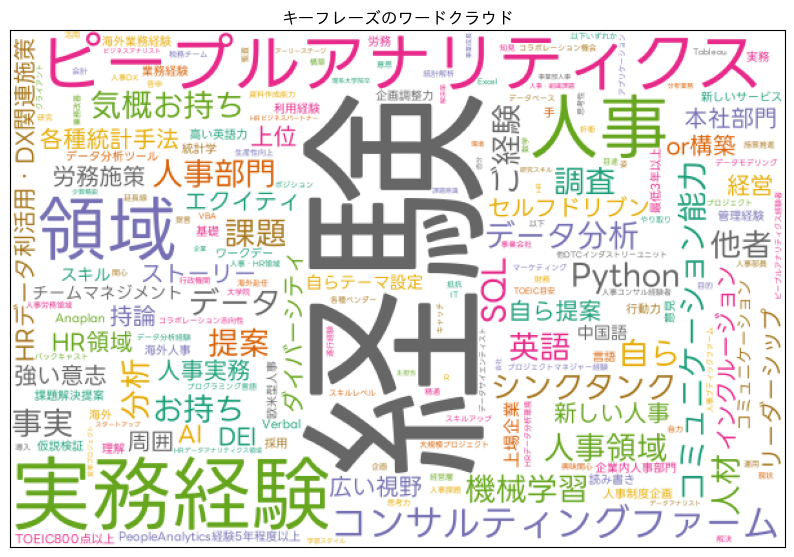

In [19]:
wordcloud = WordCloud(
    font_path='/Library/Fonts/Supplemental/LINESeedJP_TTF_Rg.ttf',
    background_color="white", width=600, height=400,
    collocations=False, colormap='Dark2', random_state=0
)
wordcloud.generate_from_frequencies(ct_keyphrases)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.imshow(wordcloud)
plt.title("キーフレーズのワードクラウド")
plt.show()

In [21]:
# 表示用のデータフレームを作成
top_phrases_df = pd.DataFrame()

# 各求人ごとにTOP5のキーフレーズとスコアを抽出
for i, kps in enumerate(kps_list):
    # スコア順にソート
    sorted_kps = sorted(kps, key=lambda x: x['score'], reverse=True)
    # TOP5を抽出（5つない場合はある分だけ）
    top5 = sorted_kps[:min(5, len(sorted_kps))]
    
    # 求人番号
    job_id = i + 1
    
    # この求人のTOP5キーフレーズとスコアを辞書に格納
    job_data = {
        '求人番号': job_id,
        '求人内容（一部）': df['求人内容_前処理済'].iloc[i][:30] + '...' if len(df['求人内容_前処理済'].iloc[i]) > 30 else df['求人内容_前処理済'].iloc[i]
    }
    
    # TOP5のキーフレーズとスコアを追加
    for j, kp in enumerate(top5):
        job_data[f'キーフレーズ{j+1}'] = kp['text']
        job_data[f'スコア{j+1}'] = round(kp['score'], 2)
    
    # 辞書をデータフレームに追加
    top_phrases_df = pd.concat([top_phrases_df, pd.DataFrame([job_data])], ignore_index=True)

In [23]:
top_phrases_df.columns

Index(['求人番号', '求人内容（一部）', 'キーフレーズ1', 'スコア1', 'キーフレーズ2', 'スコア2', 'キーフレーズ3',
       'スコア3', 'キーフレーズ4', 'スコア4', 'キーフレーズ5', 'スコア5'],
      dtype='object')

In [25]:
top_phrases_df[['求人内容（一部）', 'キーフレーズ1', 'スコア1', 'キーフレーズ2', 'スコア2', 'キーフレーズ3', 'スコア3', 'キーフレーズ4', 'スコア4', 'キーフレーズ5', 'スコア5']]

,求人内容（一部）,キーフレーズ1,スコア1,キーフレーズ2,スコア2,キーフレーズ3,スコア3,キーフレーズ4,スコア4,キーフレーズ5,スコア5
0,●人事/HR領域におけるHRデータ利活用・DX関連施策に主体...,持論,100,他者,85,労務施策,82,HR領域,81,人事,73
1,・人事部門等でのPeopleAnalytics経験5年程度以...,DEI,100,エクイティ,73,セルフドリブン,57,リーダーシップ,54,ダイバーシティ,48
2,■企業内人事部門での業務経験（人事制度企画、採用、海外人事、...,労務,100,仮説検証,96,領域,86,統計学,76,海外人事,73
3,■欧米型人事に関する実務経験（最低3年以上） ■海外とのコミ...,Anaplan,100,ピープルアナリティクス,76,実務,59,ワークデー,54,言語,53
4,・新しいサービスを自らの手で提案したいという気概お持ちの方・...,他者,100,自ら,69,気概お持ち,64,意見,60,行動力,54
5,【コラボレーション志向性】 人事ブティックファームと異なり、...,Verbal,100,読み書き,66,他DTCインダストリーユニット,63,監査,58,人事ブティックファーム,56
6,人事・HR領域に関する、以下いずれかの経験 ・コンサルティン...,コンサルティングファーム,100,シンクタンク,85,大学院,66,人事・HR領域,54,行政機関,53
7,PythonやR、SQLなどを使用したデータ分析の経験 統計...,データモデリング,100,SQL,67,Python,58,R,48,統計解析,46
8,・人事データの利活用により、組織の意思決定や施策推進への貢献...,Tableau,100,スキルレベル,79,VBA,74,目途,72,SQL,70
9,事業会社もしくはコンサルティングファームにおける以下のような...,コンサルティングファーム,100,ピープルアナリティクス,84,人事課題,57,遂行経験,55,構築,53


In [27]:
# 2) 共起ネットワーク用のグラフを作成
G = nx.Graph()

# キーフレーズのスコアを保存する辞書
phrase_scores = {}

In [29]:
# kps_list は各求人のキーフレーズ抽出結果（辞書のリスト）のリストである前提
for kps in kps_list:
    for kp in kps:
        phrase = kp['text']
        score = kp['score']
        
        # スコアの更新（同じフレーズが複数回出現する場合は平均値を使用）
        if phrase in phrase_scores:
            phrase_scores[phrase] = (phrase_scores[phrase] + score) / 2
        else:
            phrase_scores[phrase] = score
            
        if not G.has_node(phrase):
            G.add_node(phrase)
    
    phrases = [kp['text'] for kp in kps]
    for pair in itertools.combinations(set(phrases), 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)

In [31]:
# 3) レイアウト計算
pos = nx.spring_layout(G, k=1.9, iterations=200, seed=42)

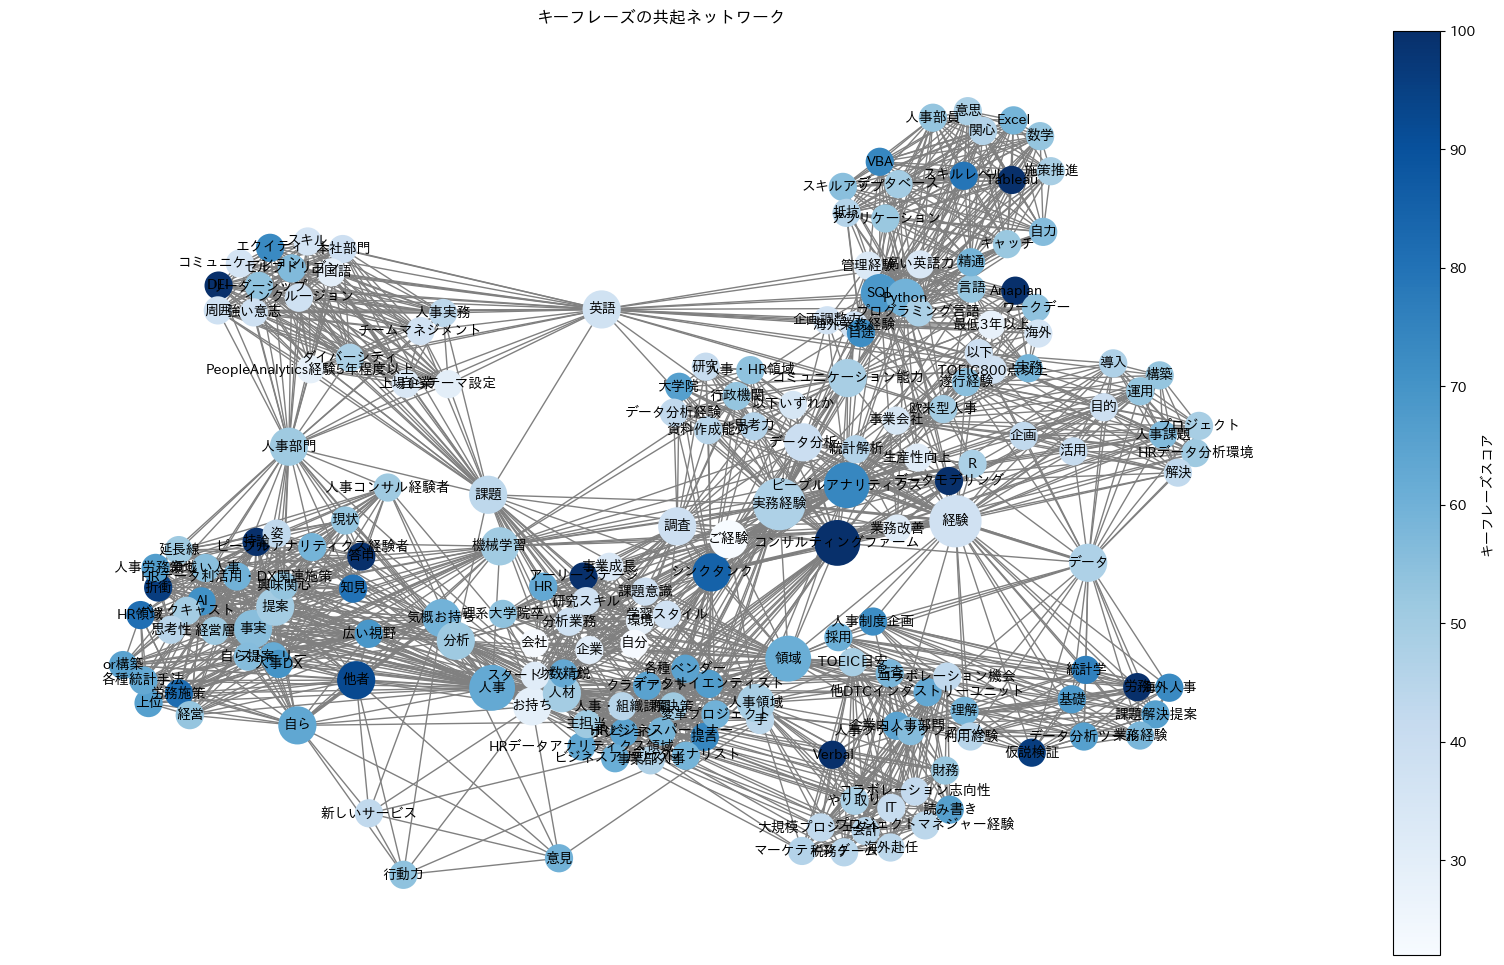

In [33]:
# 4) 描画
# メインの図を描画するための軸を作成
fig, ax = plt.subplots(figsize=(21, 12))

# ノードサイズを出現回数に基づいて設定
node_size = [ct_keyphrases[node] * 300 for node in G.nodes()]

# ノードの色をスコアに基づいて設定
node_scores = [phrase_scores.get(node, 0) for node in G.nodes()]
# スコアを0-1の範囲に正規化
norm = plt.Normalize(min(node_scores), max(node_scores))
cmap = plt.cm.Blues  # 青のグラデーション
node_colors = [cmap(norm(score)) for score in node_scores]

edges = G.edges()
edge_widths = [G[u][v]['weight'] for u, v in edges]

nx.draw(G, pos, ax=ax, with_labels=True, node_size=node_size, node_color=node_colors, linewidths=3,
        font_size=10, edge_color='grey', width=edge_widths, font_family='IPAexGothic')

# カラーバーを追加
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='キーフレーズスコア')

plt.title("キーフレーズの共起ネットワーク")
plt.axis("off")
plt.show()